# Quick tests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import ftir_funct as f
from scipy.spatial.transform import Rotation as r

from ipywidgets import interact, FloatSlider

module FTIR v.2024.3.14 imported


In [2]:
azimuths = np.linspace(0, np.deg2rad(359), 360)
colatitude = np.full_like(azimuths, np.deg2rad(90))

#np.linspace(0, 359, 360)

In [3]:
T_vals = f.T_on_plane(trans=(90, 50, 20),
                      azimuth=azimuths,
                      polar=colatitude)

In [4]:
x, y, z = f.sph2cart(T_vals, azimuths)

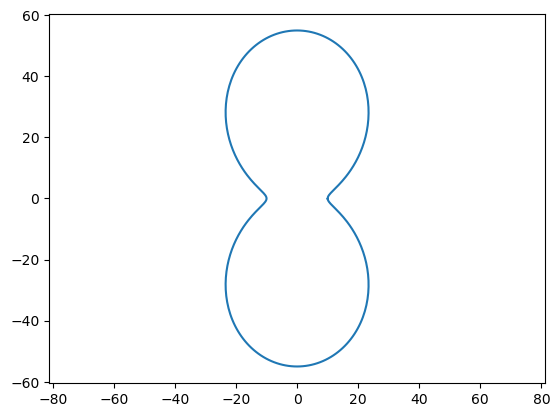

In [5]:
plt.plot(x, y, '-')
_ = plt.axis('equal')

In [6]:
azimuths = np.linspace(0, np.deg2rad(359), 360)
colatitude = np.full_like(azimuths, np.deg2rad(45))
T_vals = f.T_on_plane(trans=(90, 50, 20),
                      azimuth=azimuths,
                      polar=colatitude)

x, y, z = f.sph2cart(T_vals, azimuths, colatitude)

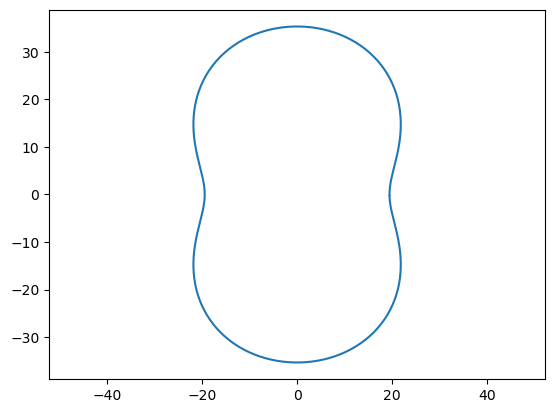

In [7]:
plt.plot(x, y, '-')
_ = plt.axis('equal')

In [8]:
# def plot_interactive(polar):
    
#     trans = (90, 50, 20)
#     azimuths = np.linspace(0, np.deg2rad(359), 360)
#     colatitude = np.full_like(azimuths, np.deg2rad(polar))

#     T_vals = f.T_on_plane(trans, azimuths, np.deg2rad(polar))

#     x, y, _ = f.sph2cart(T_vals, azimuths, colatitude)
    
#     fig, ax = plt.subplots()
#     ax.plot(x, y, '-')
#     ax.set_xlim(-100,100)
#     ax.set_ylim(-75,75)
#     ax.set_aspect('equal', 'box')

# interact(plot_interactive,
#          polar = FloatSlider(value=90, min=0, max=90, step=1.0))

## Test misorientation

In [9]:
euler1 = np.array([30, 45, 60])  # Euler angles of the first crystal (phi1, Phi, phi2)
euler2 = np.array([45, 60, 30])  # Euler angles of the second crystal (phi1, Phi, phi2)

f.calc_misorientation(euler1, euler2)

28.1

In [10]:
f.calc_misorientation(np.array([3, 90, 60]), np.array([45, 10, 0]))

85.5

In [11]:
# Example of a large misorientation angle where the function fails to find the disorientation (smallest possible)
f.calc_misorientation(np.array([3, 90, 150]), np.array([30, 10, 4]))

137.6

In this case, using this code snippet in MTEX

```matlab
ori1 = orientation.byEuler(3*degree, 90*degree, 150*degree, cs);
ori2 = orientation.byEuler(30*degree, 10*degree, 4*degree, cs);
angle(ori1, ori2.symmetrise, 'noSymmetry')./ degree
```
will give us the following misorientation angles:

```
ans =
  137.6423
  176.1438
   96.1035
   99.0320
  180.0000
```
being 96.1 the real disorientation.

To estimate the disorientation here we will need to account for all orthorhombic crystal symmetry operations to estimate all the misorientation and then pick the smallest. As stated in the function docstring: _In principle this is not a problem as this function is designed to deal with small misorientation angles._